## Clustering Jerárquico y dendrogramas

**Antes de empezar, pongamos un poco de notación para hablar todos el mismo idioma**

* X dataset (array de n x m) de puntos a clusterizar
* n numero de datos
* m numero de rasgos
* Z array de enlace del cluster con la información de las uniones
* k número de clusters

In [1]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

(150, 2)


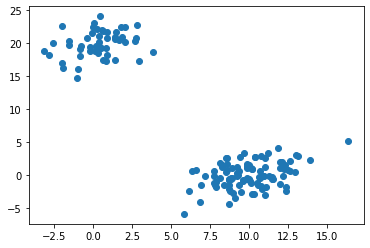

In [6]:
## generaremos 2 clusters
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size= [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size= [50,])
x = np.concatenate((a,b))
print(x.shape)
plt.scatter(x[:,0],x[:,1])
plt.show()

**Aquí tenemos un archivo de 150 filas (2 clusters), en donde se ve que tenemos un grupo que tiene media en x=10 y=0, mientras que el otro en x=0,y=20. Con desviaciones +3-1 en el eje x y +1-4 en el eje y**

In [7]:
z = linkage(x, "ward") ##creamos la matriz de distancias y los enlaces.
z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

In [8]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [10]:
c, coeph_dist= cophenet(z,pdist(x))
c   #este coeficiente, mientras más cercano a 1 esté quiere decir que neustro clustering es mejor, ya que conserva
    # las distancias iniciales de la muestra

0.9800148387574268

In [11]:
z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

**El primer paso del algoritmo fue unir el cluster 52 y 53 que están a una distancia de 0.04, uniendo 2 elementos**

In [15]:
z[13]

array([ 62.        , 152.        ,   0.17259953,   3.        ])

**note que en el elemento 13 ya tenemos un cluster nuevo generado (153) por ello a su vez tendremos 3 elementos uniendose**

In [16]:
z[152-len(x)] ## nos dice cual es el cluster 152, de donde viene formado

array([33.        , 68.        ,  0.07106779,  2.        ])

#### los 3 primeros elementos que se juntan generalmente se remarcan en el scatter plot inicial, para ver si es que hay similitudes realmente

In [17]:
x[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

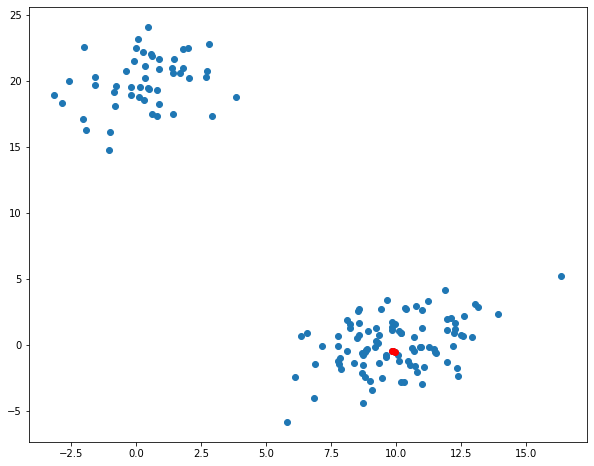

In [20]:
## creamos un array con los 3 primeros elementos
idx= [33,62,68]
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1]) ## pintar todos los puntos
plt.scatter(x[idx,0],x[idx,1],c="r") #pintamos los 3 primeros elementos en color
plt.show()

## Representación gráfica de un dendrograma

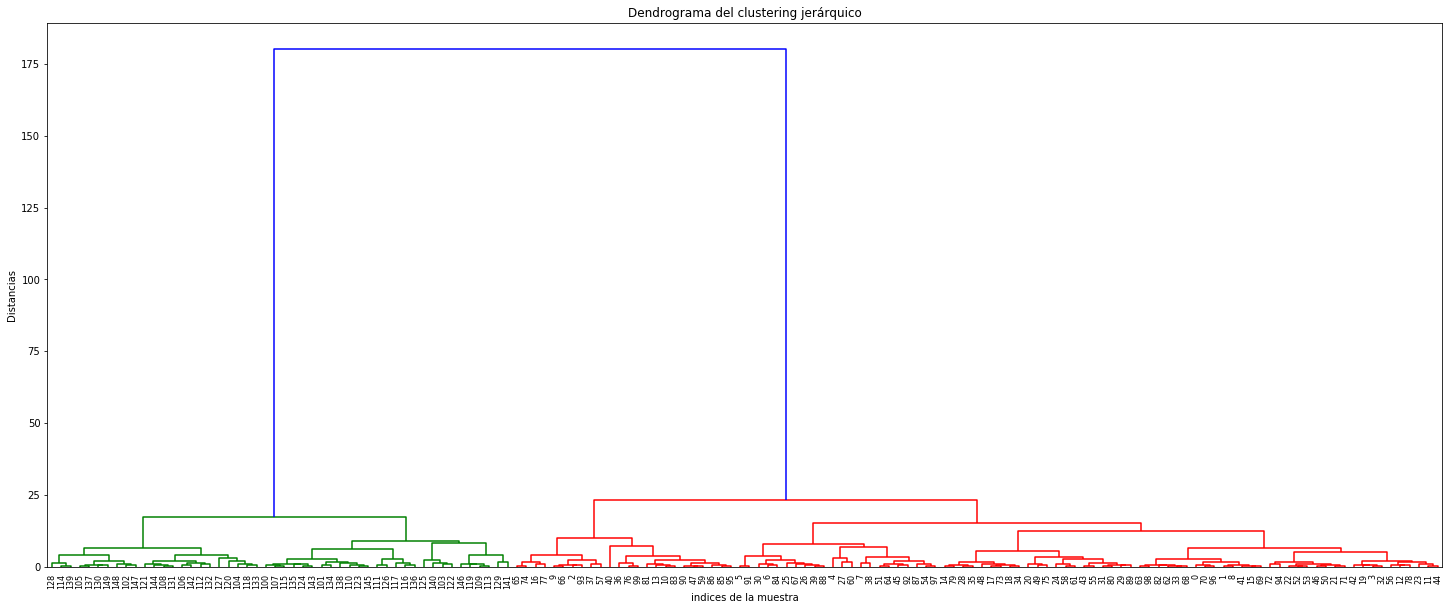

In [24]:
plt.figure(figsize=(25,10)) #ancho,alto
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("indices de la muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90,leaf_font_size=8)  #leaf_rotation es para que los label salgan rotados (vertical)
plt.show()

**Veamos los saltos finales, a veces cuando las distancias son muy grandes, nos dice que esos elementos quizás no debiesen haberse unido**

In [26]:
z[-4:,]  ##ultimos 4 elementos

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

**vemos que un salto de 23 a 180 en distancia, nos dice que el ultimo grupo no debiese haberse unido**

**Se pueden asignar colores con distintos thresholds para denotar más facilmente el dendrograma, por defecto tiene un 70% de los datos, comenzando de la muestra final**

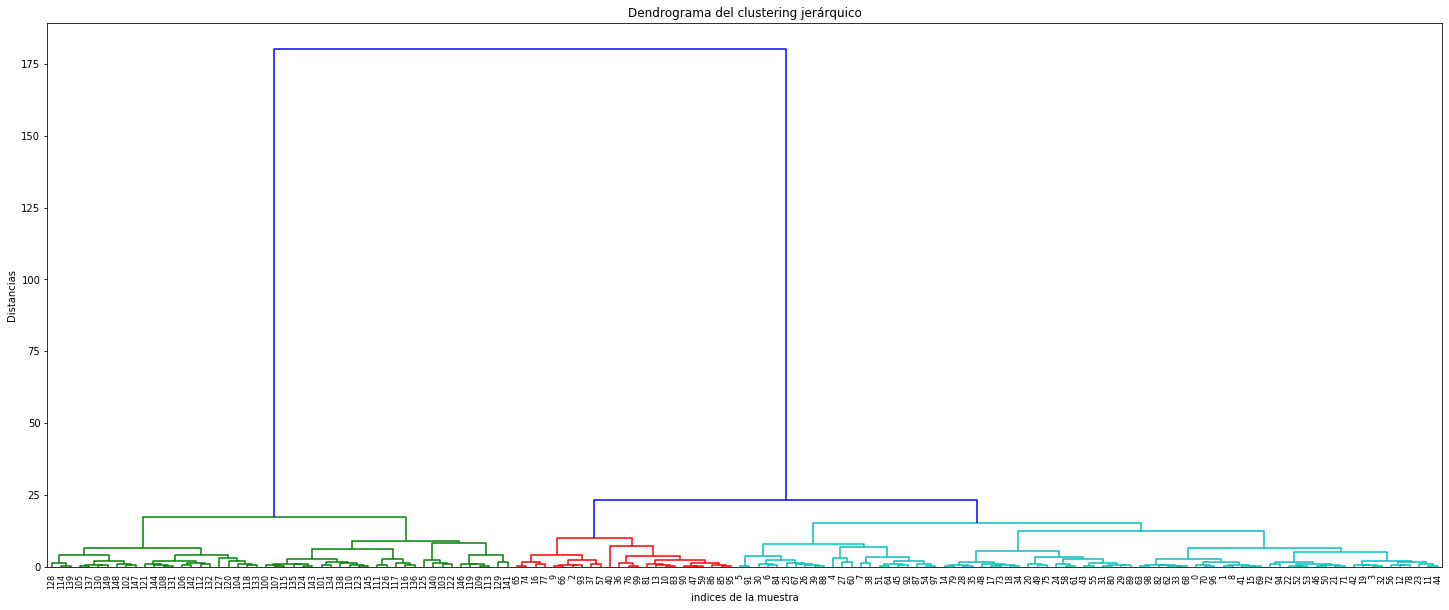

In [32]:
plt.figure(figsize=(25,10)) #ancho,alto
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("indices de la muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90,leaf_font_size=8,color_threshold=0.1*180)  #desde el 10% de los datos en adelante
plt.show()

## Trucar el Dendrograma

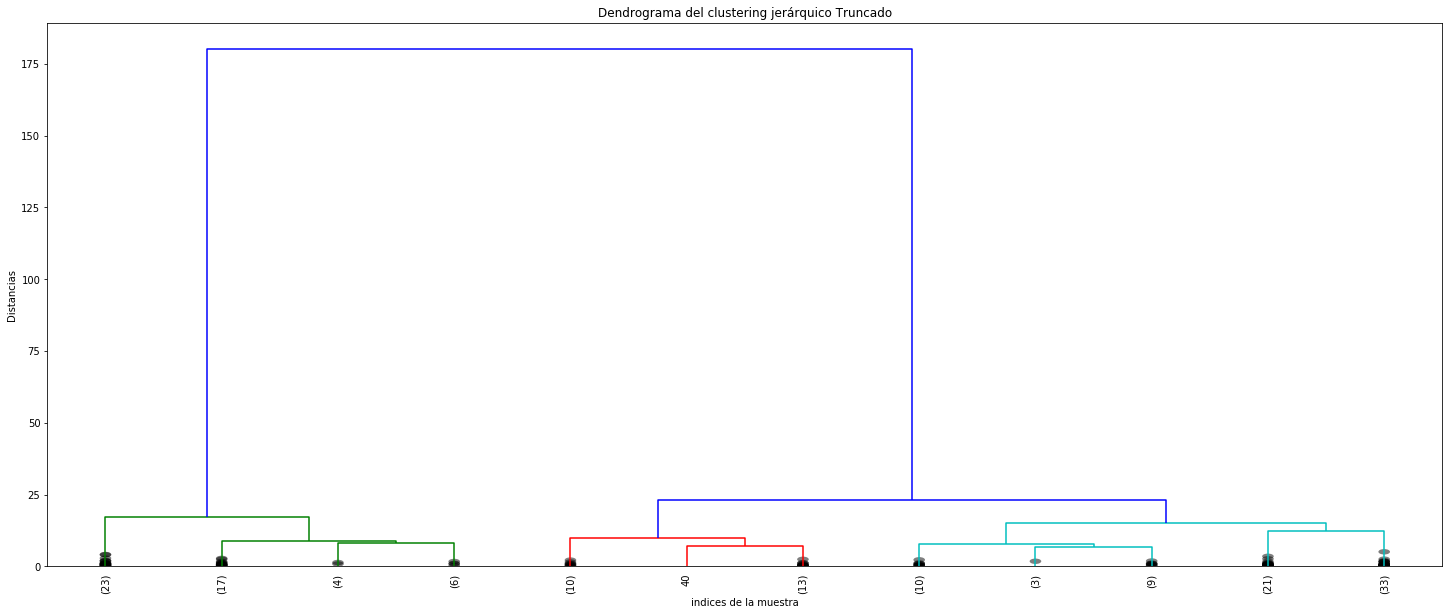

In [36]:
plt.figure(figsize=(25,10)) #ancho,alto
plt.title("Dendrograma del clustering jerárquico Truncado")
plt.xlabel("indices de la muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=90,leaf_font_size=10, color_threshold=0.1*180,
          truncate_mode="lastp", p=12, show_leaf_counts=True, show_contracted=True)  #los ultimos p clusters que han sido unidos 
plt.show()

**EL parámetro show_contracted nos permite contraer las muestras que posee cada cluester. Mientras que el show_lead_counts nos muestra los clusters que comprenden cada cluster mayor (si está en True)** 

## Dendrograma tuneado(personalizado)

In [53]:
def dendrogram_tune(*args, **kwargs):
    max_d=kwargs.pop("max_d",None)
    if max_d and "color_threshold" not in kwargs:
        kwargs["color_threshold"] = max_d
    annotate_above = kwargs.pop("annotate_above",0)
    
    ddata=dendrogram(*args,**kwargs)
    
    if not kwargs.get("no_plot",False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("indice del Dataset (o tamaño del cluster)")
        plt.ylabel("distancia")
        for i, d, c in zip(ddata["icoord"],ddata["dcoord"],ddata["color_list"]):
            x= 0.5*sum(i[1:3])
            y= d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate("%.3g"%y,(x,y),xytext=(0,-5), textcoords="offset points",va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d,c="k")
        
    return ddata
    

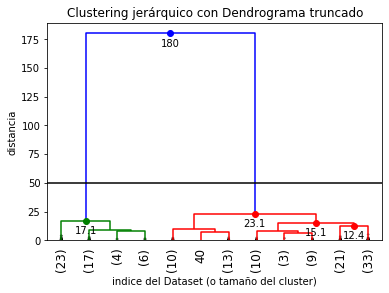

In [59]:
dendrogram_tune(z,truncate_mode="lastp",p=12,leaf_rotation=90,leaf_font_size=12,show_contracted=True,
                show_leaf_counts=True,annotate_above=10,max_d=50)
plt.show()

**COn la funcion creada, se puede generar un dendrograma mucho más legible, el parámetro annotate_above nos poone las distancias de los nodos, solmente para aquellos que nodos que tengan una distancia mayor al numero puesto, es decir, annotate_above=10 muestra los numeros para distancias mayores a 10**

**Muchas veces querremos cortar o truncar el clustering considerando que lso ultimos clusters no precisamente sean representativos, ya vimos como hacerlo manualmente con python y la función creada. Ahora veamos como lo hace internamente python**

## Corte automatico del dendrograma

### Método de la inconsistencia

inconsistencia_i = (h_i-avg(h_j))/std(h_j)  

std: desviación standar
avg: promedio de toda la muestra

In [60]:
from scipy.cluster.hierarchy import inconsistent

In [63]:
depth = 5
incons = inconsistent(z,depth)
incons[-10:]
# promedio, desviacion, n elementos, factor de inconsistencia

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

**Los valores de inconsistencia son sumamente dependientes del valor de la profundidad que le entreguemos, ya que la formula considera el promedio de todas las muestras considerando el nivel de profundidad entregado. Por lo tanto no es muy recomendable!**

## Método del codo

Intenta buscar el paso en donde la aceleración de la distancia es mayor, donde está el mayor desequilibrio en el arbol

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


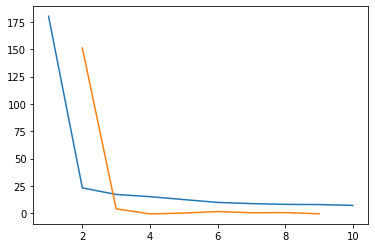

EL número optimo de cluster es 2


In [71]:
last= z[-10:,2]   #tomamos las distancias de los ultimos 10 elementos
last_rev= last[::-1]   # revertimos el orden, el ultimo pasa a ser el primero
print(last_rev)
idx= np.arange(1, len(last)+1)
plt.plot(idx,last_rev)

aceleraciones= np.diff(last,2)
acc_rev = aceleraciones[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("EL número optimo de cluster es %s" %str(k))

**Podemos ver el codo, agresivo quer se encuentra al princio, cuando unimos el 2do cluster desde la cola**


**Cuando hay muchos valores, el metodo del codo falla, veamos un caso.**

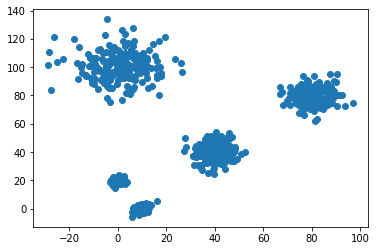

In [73]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]],size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]],size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]],size=[200,])
x2= np.concatenate((x,c,d,e),)
plt.scatter(x2[:,0],x2[:,1])
plt.show()

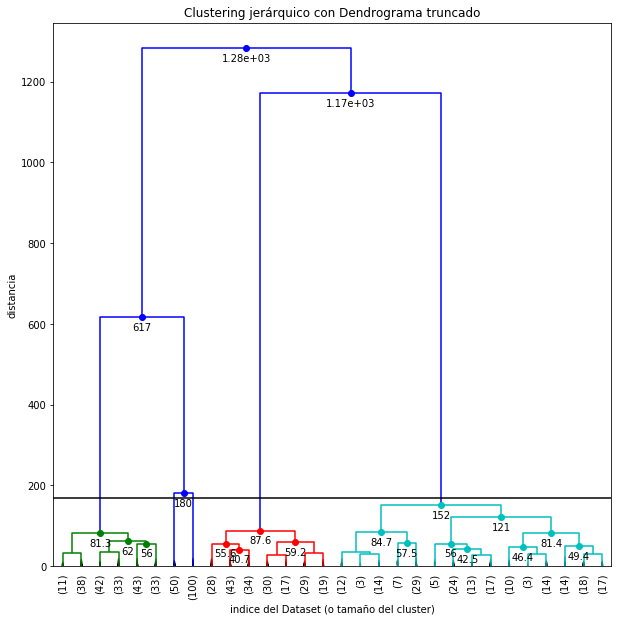

In [74]:
z2=linkage(x2,"ward")
plt.figure(figsize=(10,10))
dendrogram_tune(
    z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90,
    leaf_font_size=10,
    show_contracted=True,
    annotate_above=40,
    max_d=170
)
plt.show()

[1282.46706354 1170.98586166  616.54762239  180.27043021  151.60666456
  121.12826348   87.63025871   84.6531831    81.40781749   81.26914533]


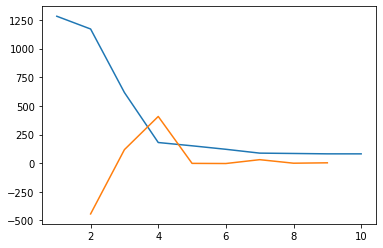

EL número optimo de cluster es 4


In [75]:
## veamos ahora como funciona el método del codo.

last= z2[-10:,2]   #tomamos las distancias de los ultimos 10 elementos
last_rev= last[::-1]   # revertimos el orden, el ultimo pasa a ser el primero
print(last_rev)
idx= np.arange(1, len(last)+1)
plt.plot(idx,last_rev)

aceleraciones= np.diff(last,2)
acc_rev = aceleraciones[::-1]
plt.plot(idx[:-2]+1,acc_rev)
plt.show()
k = acc_rev.argmax()+2
print("EL número optimo de cluster es %s" %str(k))

In [76]:
print(inconsistent(z2,5)[-10:])

[[ 17.77607317  18.87474236  30.           3.36391729]
 [ 15.23571589  17.63042243  29.           3.75329076]
 [ 17.5423546   18.98041797  25.           3.53579297]
 [ 19.71893206  18.70559634  31.           3.63053524]
 [ 25.39008081  26.21789135  28.           3.6516355 ]
 [ 36.46474732  34.13171399  30.           3.3734584 ]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 43.46845429 111.71230335  31.           5.12995571]
 [ 80.34950945 205.0127263   31.           5.31984707]
 [147.0446429  308.44162511  31.           3.68115821]]


**Aquí podemos ver que nos dice que el número optimo de casos es considerar 4 clusters, pero sin embargo si miramos a ojo desnudo el scatter plot nos damos cuenta que deberían salir 5 clusters y no 4, es por ello que hay que tener cuidado cuando utilicemos este tipo de métodos.**

## Recuperar los clusters y sus elementos.

In [78]:
from scipy.cluster.hierarchy import fcluster

In [80]:
## de esta manera podemos a que cluster pertence cada elemento.
max_d=20
clusters=fcluster(z,max_d, criterion="distance") #lo podemos utilizar con criterio de distancia
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [86]:
#utilizamos criterio de N cluster
k=2
clusters=fcluster(z,k, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

**si queremos automatizar, basta entregar por ejemplo los parámetros para el método de inconsistencia que es el que viene por defecto en python**

In [87]:
fcluster(z,8,depth=10)  # 8 es el número minimo de elementos por clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

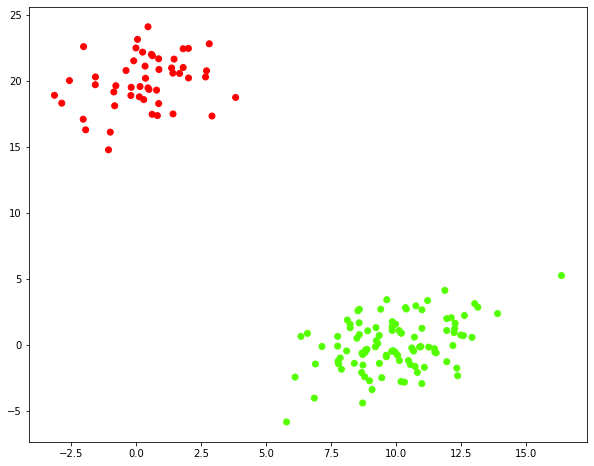

In [88]:
##para visualizar mejor el grupo.
plt.figure(figsize=(10,8))
plt.scatter(x[:,0],x[:,1],c=clusters, cmap="prism")
plt.show()

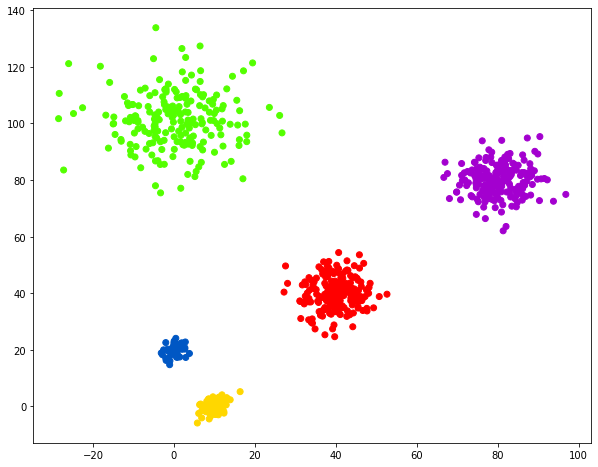

In [99]:
max_d=170
clusters_z2=fcluster(z2,max_d, criterion="distance") #lo podemos utilizar con criterio de distancia
#clusters_z2=fcluster(z2,7,depth=10) #lo podemos utilizar con criterio de distancia

clusters_z2
plt.figure(figsize=(10,8))
plt.scatter(x2[:,0],x2[:,1],c=clusters_z2, cmap="prism")
plt.show()